In [1]:
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC

# # 1) Setup Chrome + webdriver-manager
# service = Service(ChromeDriverManager().install())
# driver  = webdriver.Chrome(service=service)
# driver.get("https://www.cardekho.com/usedCars")

# wait = WebDriverWait(driver, 10)

# # 2) Wait for the “Similar Cars” section to load
# similar_sec = wait.until(EC.presence_of_element_located(
#     (By.CLASS_NAME, "carsListForSimilarcar")
# ))

# # 3) Grab each individual card
# cards = similar_sec.find_elements(By.CLASS_NAME, "cardColumnListView")

# for card in cards:
#     # — Title (2024 BMW X5 xDrive40i M Sport)
#     #   <div class="titlebox hover"><h3 class="title"><a ... title="...">
#     title_el = card.find_element(
#         By.CSS_SELECTOR,
#         "div.titlebox.hover h3.title a"
#     )
#     name = title_el.get_attribute("title").strip()
    
#     # — Details (5,500 kms • Petrol • Automatic)
#     #   <div class="dotsDetails">…</div>
#     details = card.find_element(By.CLASS_NAME, "dotsDetails").text.strip()
    
#     # — Price (₹1.03 Crore)
#     #   <div class="Price"><p>…</p></div>
#     price = card.find_element(
#         By.CSS_SELECTOR,
#         "div.Price p"
#     ).text.strip()
    
#     # — Location (Saraswati Nagar, Jaipur)
#     #   <div class="distanceText">…</div>
#     location = card.find_element(
#         By.CLASS_NAME,
#         "distanceText"
#     ).text.strip()
    
#     print(f"Name:     {name}")
#     print(f"Details:  {details}")
#     print(f"Price:    {price}")
#     print(f"Location: {location}")
#     print("-" * 40)

# driver.quit()


In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import seaborn as sns 

dataset = pd.read_csv("cardekho_dataset.csv", index_col = 0)
df = dataset.copy()

In [3]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


Dirty Issue

total 2 'Honda City', 'Nissan Kicks' have zero seats! it should be 5 acc to other mentions of same model. "Validity"
19542	Mahindra XUV500 has km driven very high....   therefore removing it.    "Accuracy"
df[df['vehicle_age']>15] are heavy outliers, infact 75%ile is 8yrs and max is 29 yrs!!    "Accuracy"
4845	Ferrari GTC4Lusso , 12839	Bentley Continental actually have a low mileage, reducing the mileage too much, they r not good for the model.  "Validity"


Messy Issue

Car name is a column not required, infact, can always be found just by printing brand and model name.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15411 entries, 0 to 19543
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.6+ MB


In [53]:
df.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
duplicates = df[df.duplicated(subset=['car_name', 'km_driven'], keep=False)]
print("Shape of original:", df.shape)
print("Shape of duplicates:", duplicates.shape)



Shape of original: (15411, 13)
Shape of duplicates: (9565, 13)


<Axes: title={'center': 'Mileage Distribution'}>

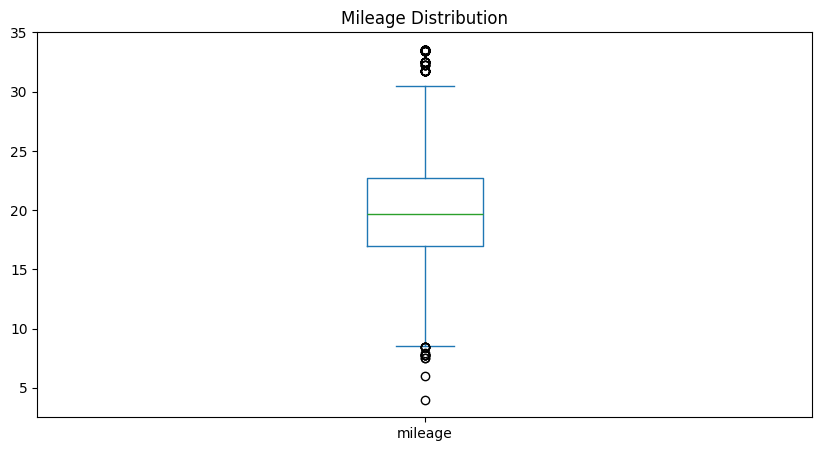

In [ ]:
df['mileage'].plot(kind='box', figsize=(10, 5), title='Mileage Distribution') 

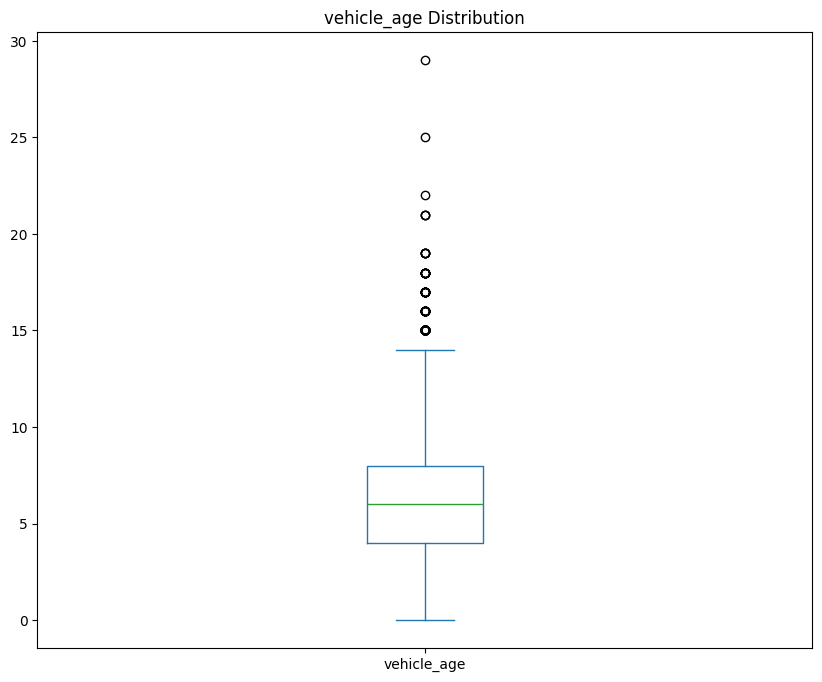

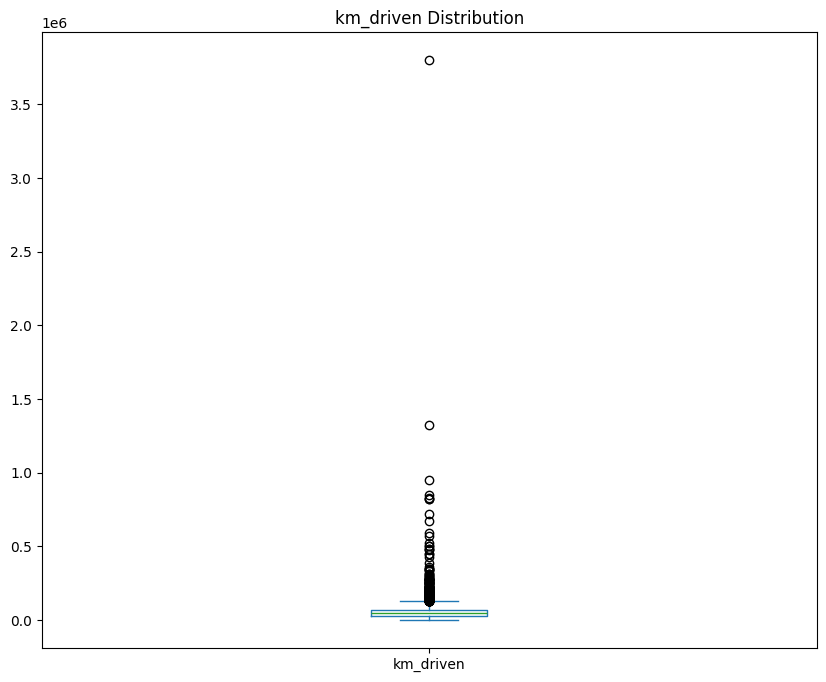

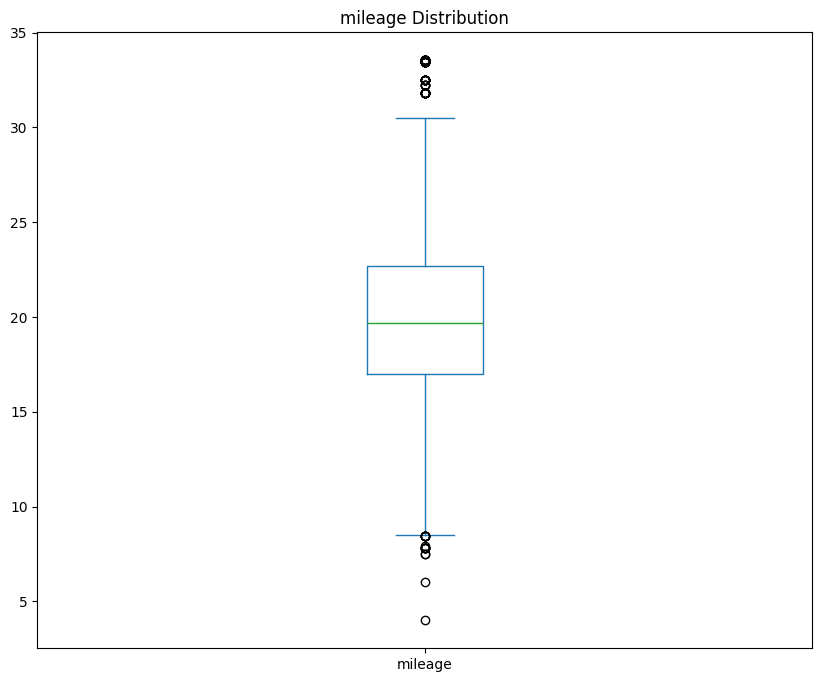

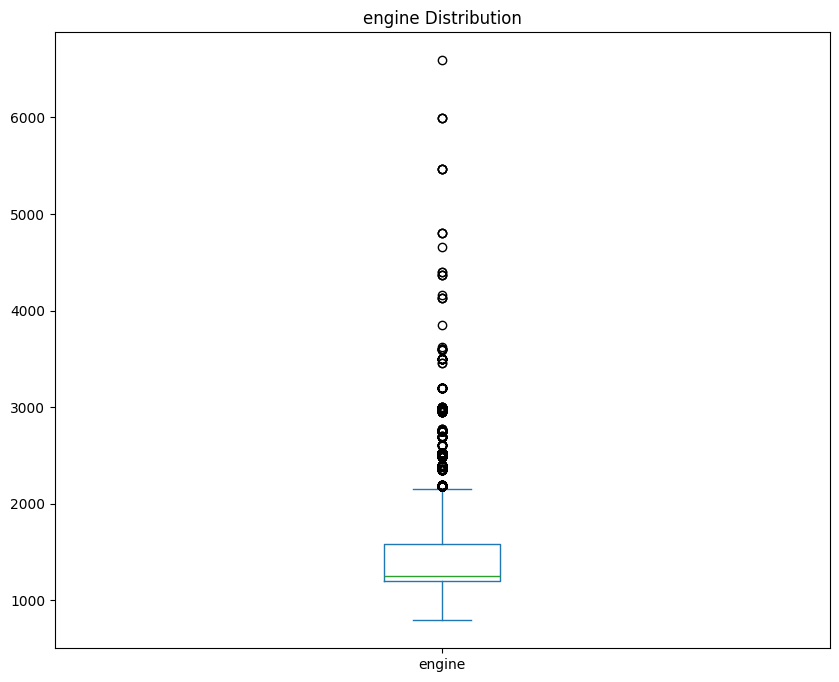

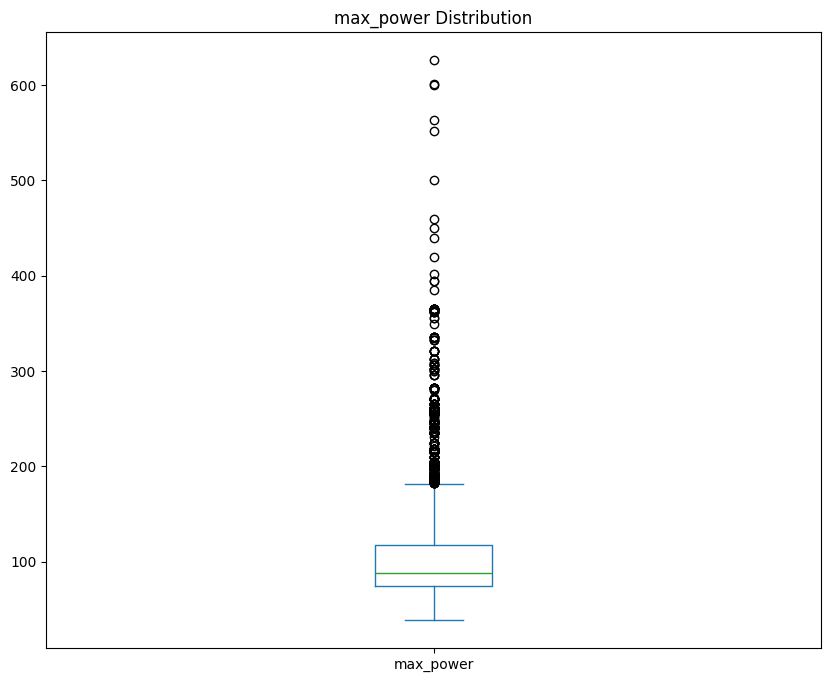

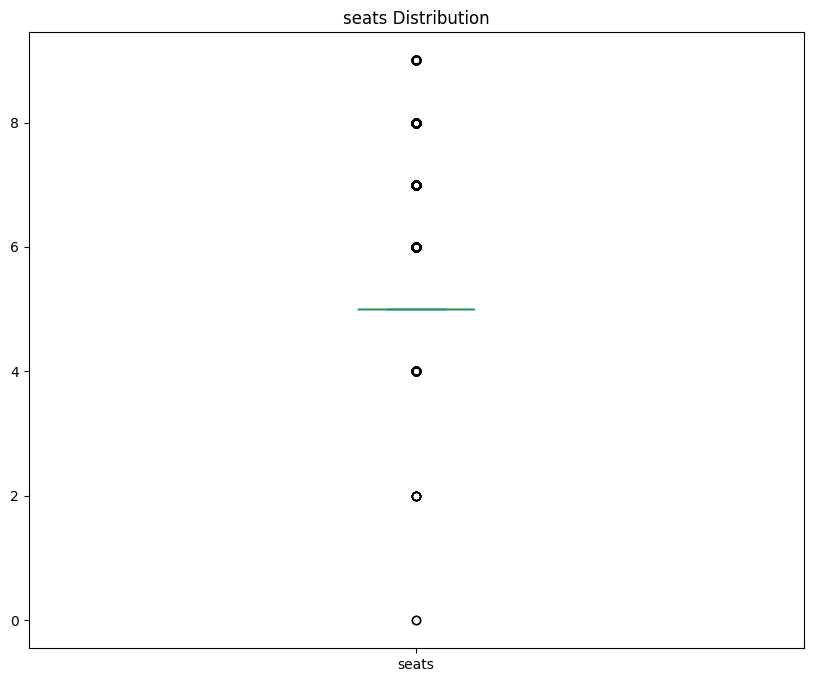

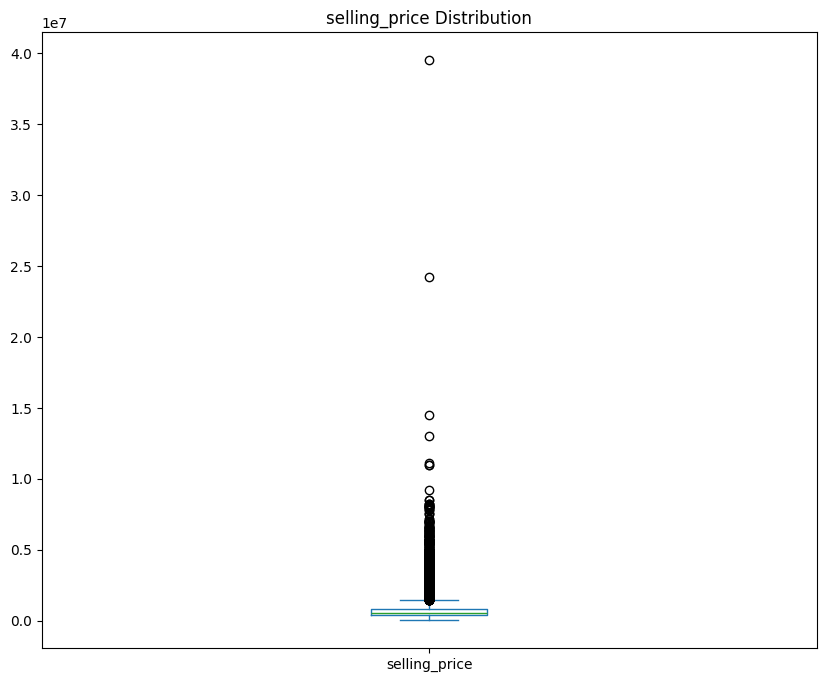

In [11]:
# List of numerical columns
numerical_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Create box plots for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 8))
    df[column].plot(kind='box', title=f'{column} Distribution')
    plt.show()

In [ ]:
#df[df['selling_price'] > 10000000]
#print("Cars with selling price greater than 1 crore:")
df[df['seats'] <4]
df[df['car_name'].isin(['Honda City', 'Nissan Kicks'])]
df[(df['seats'] >= 8) & (df['car_name'] != 'Toyota Innova')].sample(50)
# this data seems valid for upper outliers of seats column


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
5404,Mahindra Scorpio,Mahindra,Scorpio,8,209000,Individual,Diesel,Manual,12.05,2179,120.0,8,700000
1274,Mahindra Scorpio,Mahindra,Scorpio,13,120000,Individual,Diesel,Manual,10.50,2609,120.0,9,300000
11889,Mahindra Scorpio,Mahindra,Scorpio,8,66000,Dealer,Diesel,Manual,12.05,2179,120.0,9,500000
7751,Mahindra Bolero,Mahindra,Bolero,4,120000,Individual,Diesel,Manual,15.96,2523,63.0,9,550000
5299,Mahindra Marazzo,Mahindra,Marazzo,2,33000,Dealer,Diesel,Manual,17.30,1497,121.0,8,1335000
479,Mahindra Marazzo,Mahindra,Marazzo,2,60000,Individual,Diesel,Manual,17.30,1497,121.0,8,1476000
11803,Kia Carnival,Kia,Carnival,1,3000,Dealer,Diesel,Automatic,14.11,2199,197.2,9,3000000
7252,Mahindra Scorpio,Mahindra,Scorpio,8,93000,Dealer,Diesel,Manual,12.05,2179,120.0,8,770000
9880,Mahindra Scorpio,Mahindra,Scorpio,7,120000,Individual,Diesel,Manual,12.05,2179,120.0,9,492000
16570,Mahindra Scorpio,Mahindra,Scorpio,6,48000,Dealer,Diesel,Manual,15.40,2179,120.0,8,850000


In [58]:
df[df['mileage'] > 32]
#seems valid
df[df['mileage'] <7]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
4845,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.0,3855,601.0,4,39500000
12839,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.0,5998,600.0,5,5200000


In [49]:
df[df['km_driven'] > 3000000] 
#seems valid, outlier is an exception, it might cause little bias in the model.

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.0,2179,140.0,7,1225000


In [55]:
df[df['vehicle_age']>15]

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
319,Maruti Alto,Maruti,Alto,16,70000,Individual,Petrol,Manual,19.7,796,46.30,5,85000
441,Maruti Alto,Maruti,Alto,16,5000,Individual,Petrol,Manual,19.7,796,46.30,5,95000
477,Maruti Alto,Maruti,Alto,16,56700,Individual,Petrol,Manual,19.7,796,46.30,5,75000
584,Maruti Wagon R,Maruti,Wagon R,16,33650,Individual,Petrol,Manual,18.9,998,67.10,5,110000
680,Maruti Wagon R,Maruti,Wagon R,17,50000,Individual,Petrol,Manual,18.9,998,67.10,5,62000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18768,Honda CR-V,Honda,CR-V,17,87000,Dealer,Petrol,Automatic,13.7,1997,153.86,5,450000
18872,Mercedes-Benz E-Class,Mercedes-Benz,E-Class,17,126000,Dealer,Diesel,Automatic,11.0,2987,198.50,5,315000
18888,Maruti Alto,Maruti,Alto,16,91000,Dealer,Petrol,Manual,19.7,796,46.30,5,125000
19030,Maruti Wagon R,Maruti,Wagon R,16,50000,Individual,Petrol,Manual,18.9,998,67.10,5,75000


In [63]:
df = dataset.copy()
df

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


### Now handling the found issues

Dirty Issue

total 2 'Honda City', 'Nissan Kicks' have zero seats! it should be 5 acc to other mentions of same model. "Validity"
19542	Mahindra XUV500 has km driven very high....   therefore removing it.    "Accuracy"
df[df['vehicle_age']>15] are heavy outliers, infact 75%ile is 8yrs and max is 29 yrs!!    "Accuracy"
4845	Ferrari GTC4Lusso , 12839	Bentley Continental actually have a low mileage, reducing the mileage too much, they r not good for the model.  "Validity"

Messy Issue

Car name is a column not required, infact, can always be found just by printing brand and model name.

In [132]:

df.loc[(df['car_name'].isin(['Honda City', 'Nissan Kicks'])) & (df['seats'] == 0), 'seats'] = 5

# Drop Ferrari and Bentley
df = df[~df['car_name'].isin(['Ferrari GTC4Lusso', 'Bentley Continental'])]

# Drop Mahindra
df = df[~((df['car_name'] == 'Mahindra XUV500') & (df['km_driven'] > 2_000_000))]

## Remove cars older15 years
df = df[df['vehicle_age'] <= 15]

# drop  column car_name
df.drop(columns=['car_name'], inplace=True)


In [65]:
df

,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...
19536,Hyundai,Grand,5,9229,Dealer,Petrol,Manual,18.90,1197,82.00,5,545000
19537,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
19540,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
19541,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000


In [66]:
#  Data Types & Consistency: 

In [ ]:
def extract_year(model_str):
    # Example: converts "2015-model" → 2015
    if isinstance(model_str, str) and '-model' in model_str:
        return int(model_str.split('-')[0])
    return model_str

#df= df.apply(extract_year)
df['model']= df['model'].apply(extract_year)

In [72]:
def standard(cat):
    if isinstance(cat, str):
        return cat.strip().capitalize()
    return cat

df['fuel_type']= df['fuel_type'].apply(standard)
df['transmission_type']= df['transmission_type'].apply(standard)


In [ ]:
## no mention of location present in the dataset 
# + now the next part

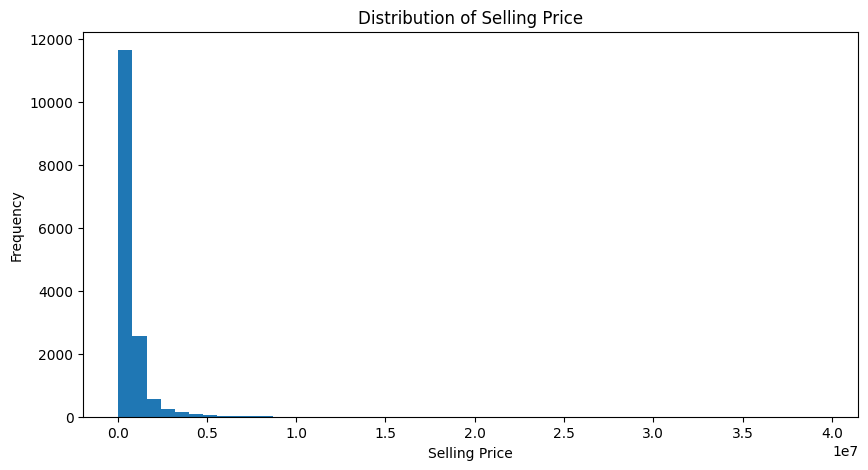

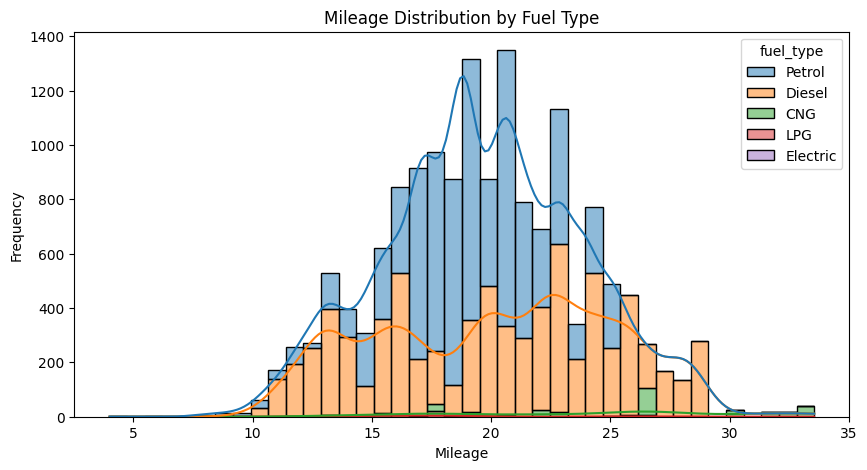

In [87]:
#Univariate: Histograms of price, mileage by fuel type, year distribution. 
df['selling_price'].plot(kind='hist', bins=50, figsize=(10,5))
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='mileage', hue='fuel_type', bins=40,kde=True,  multiple='stack')
plt.title("Mileage Distribution by Fuel Type")
plt.xlabel("Mileage")
plt.ylabel("Frequency")
plt.show()



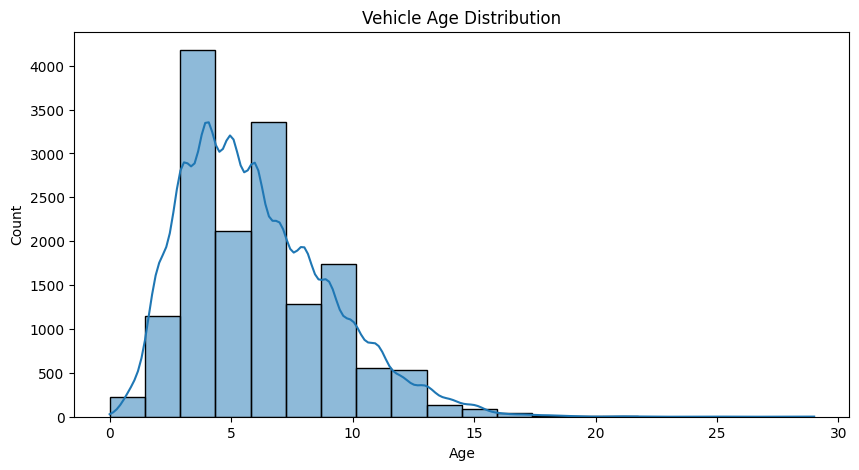

In [89]:
plt.figure(figsize=(10,5))
sns.histplot(df['vehicle_age'], bins=20, kde=True)
plt.title("Vehicle Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


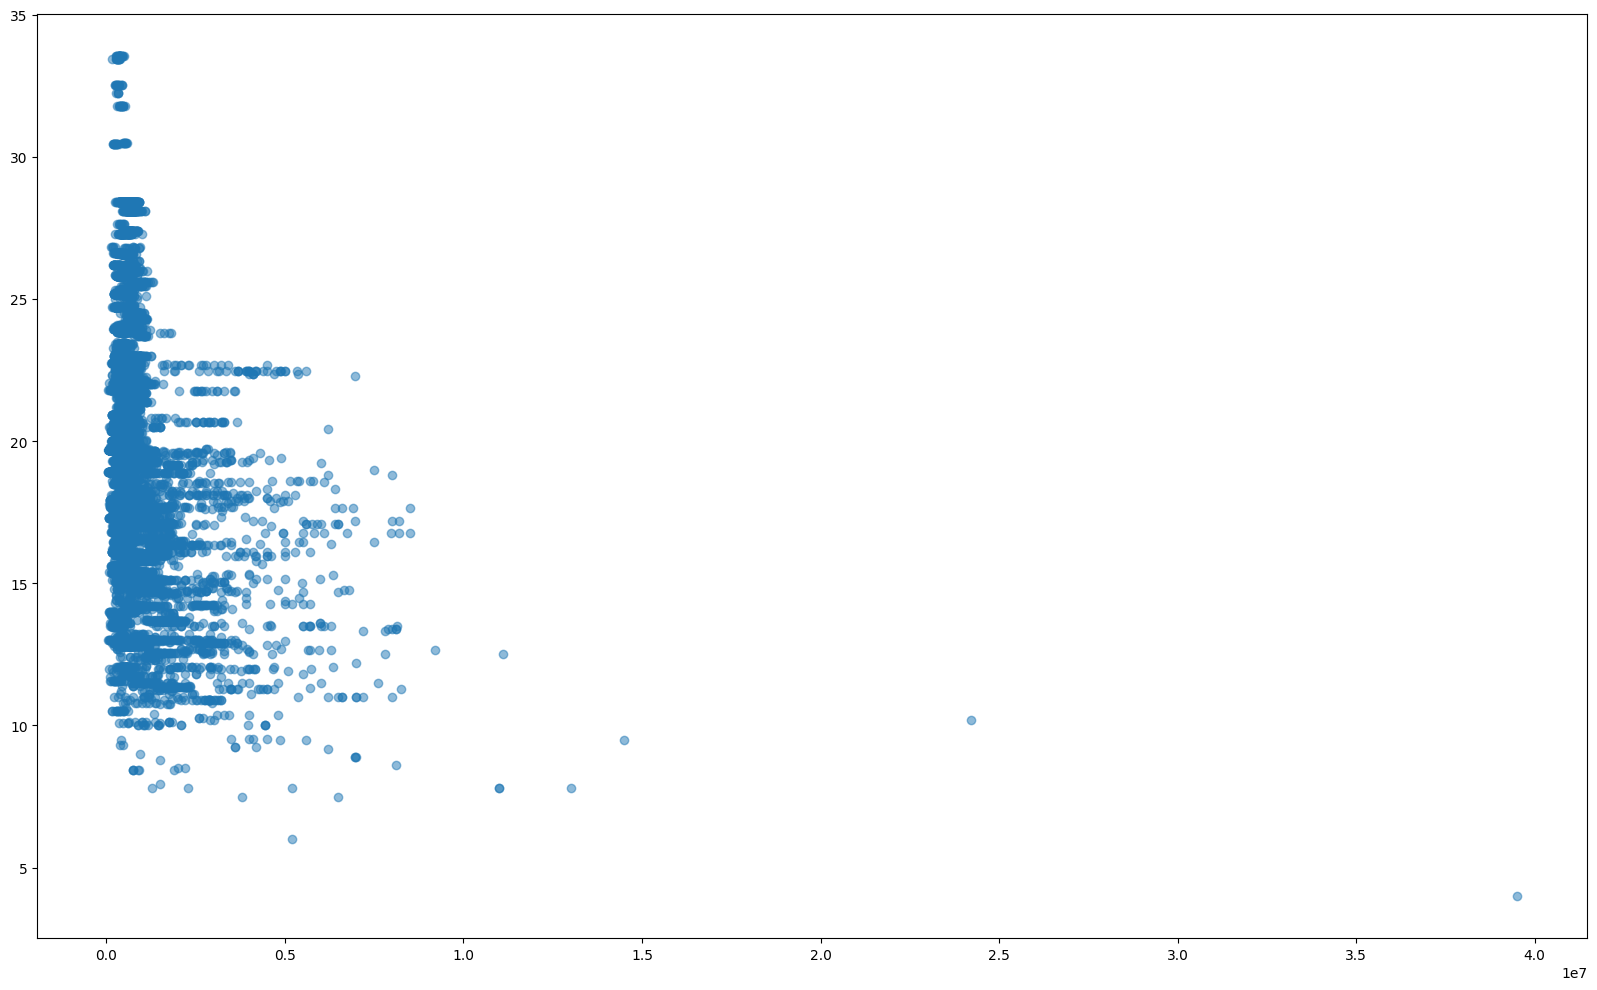

In [106]:
#Bivariate:

# 1) o Price vs. mileage scatter with regression line. 

plt.figure(figsize=(20,12))
x = df['selling_price']
y = df['mileage']
plt.plot(x, y, 'o', alpha=0.5)
plt.show()


<Figure size 3000x1500 with 0 Axes>

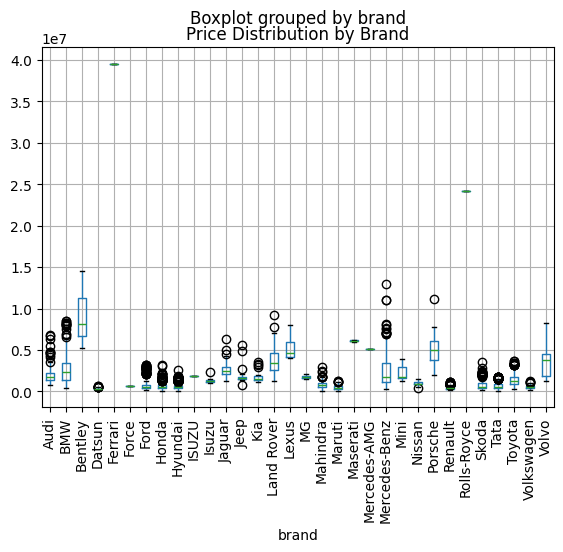

<Figure size 2500x2000 with 0 Axes>

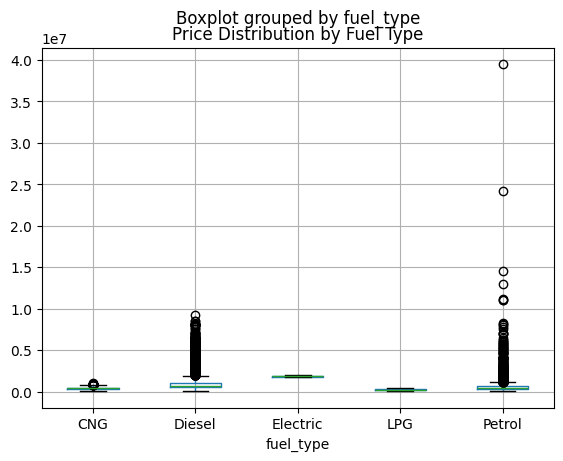

<Figure size 2500x2000 with 0 Axes>

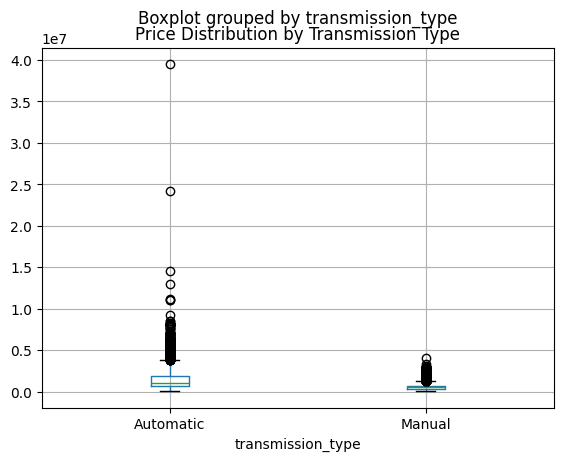

In [118]:

plt.figure(figsize=(30, 15))
df.boxplot(column='selling_price', by='brand')
plt.title("Price Distribution by Brand")
plt.xticks(rotation=90)
plt.show()

# A slightly smaller one for fewer fuel types
plt.figure(figsize=(25, 20))
df.boxplot(column='selling_price', by='fuel_type')
plt.title("Price Distribution by Fuel Type")
plt.show()

# An even smaller one for fewer transmission types
plt.figure(figsize=(25, 20))
df.boxplot(column='selling_price', by='transmission_type')
plt.title("Price Distribution by Transmission Type")
plt.show()

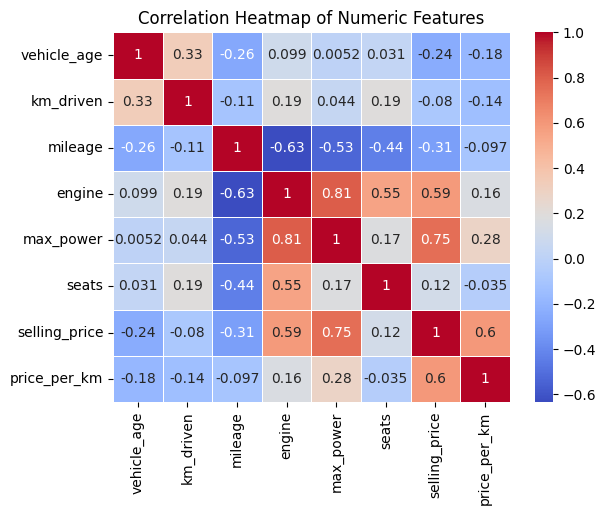

In [123]:
#Heatmap of correlation among numeric features.
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
#Geospatial (Bonus): Map average prices by city/state using folium or geopandas.
# No location data is present in the dataset!

In [90]:
# Feature Engineering part

In [ ]:
#1) no Mention of manufacturing year is df

#2)
df['price_per_km'] = df['selling_price'] / df['km_driven']

#3) 
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['brand', 'fuel_type', 'transmission_type']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

encoded_df.index = df.index
df = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)


#4)
dff = df.copy()

from sklearn.preprocessing import StandardScaler

numeric_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df = df.dropna(subset=numeric_cols).copy()

df


,model,vehicle_age,km_driven,seller_type,mileage,engine,max_power,seats,selling_price,price_per_km,...,brand_Toyota,brand_Volkswagen,brand_Volvo,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,Alto,1.030398,1.547722,Individual,-0.003735,-1.335862,-1.285417,-0.405735,-0.788659,-0.509561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Grand,-0.338055,-0.842369,Individual,-0.195737,-0.559544,-0.439853,-0.405735,-0.269653,0.320112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,i20,1.714624,0.113667,Individual,-0.651740,-0.559544,-0.487224,-0.405735,-0.673995,-5.929541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Alto,1.030398,-0.436054,Individual,0.289067,-0.944799,-0.792764,-0.405735,-0.660718,1.515221,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,Ecosport,0.004058,-0.603360,Dealer,0.733070,0.023179,-0.046915,-0.405735,-0.245513,0.406910,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19536,Grand,-0.338055,-1.099806,Dealer,-0.195737,-0.559544,-0.439853,-0.405735,-0.275688,0.250669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19537,i10,1.030398,-1.064098,Dealer,0.022665,-0.774435,-0.770263,-0.405735,-0.631750,0.593695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19540,Ertiga,-1.364394,-0.890171,Dealer,-0.531739,-0.218816,-0.224317,2.076237,0.182969,-0.205543,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
19541,Rapid,0.004058,0.280974,Dealer,0.341867,0.023179,0.069854,-0.405735,-0.420527,-1.496677,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
